In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\hasnain\CodeAlpha Internship\Datasets\Credit Scoring Dataset.csv")
df.head()

,Age,Gender,Education,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Payment_History,Employment_Status,Residence_Type,Marital_Status,Creditworthiness
0,56,Female,Master,149406,34089,581,49200,60,4,Bad,Unemployed,Rented,Single,1
1,69,Female,High School,78896,8626,648,20147,24,7,Good,Employed,Mortgaged,Married,1
2,46,Female,Master,119339,46281,329,41307,12,8,Bad,Unemployed,Owned,Single,1
3,32,Male,High School,131067,29403,816,19019,60,8,Bad,Employed,Owned,Single,1
4,60,Male,PhD,38001,30032,673,16317,36,4,Average,Employed,Rented,Married,0


In [7]:
# Data Preprocessing
# Handle missing values if any
df.dropna(inplace=True)

In [8]:
# Encode categorical columns if needed (example: gender, education)
df = pd.get_dummies(df, drop_first=True)

In [11]:
#Features and target
X = df.drop('Creditworthiness', axis=1) 
y = df['Creditworthiness']

In [12]:
df.describe()

,Age,Income,Debt,Credit_Score,Loan_Amount,Loan_Term,Num_Credit_Cards,Creditworthiness
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,43.489250,85222.009417,25354.673250,573.967583,25113.951250,35.943000,4.985833,0.702583
std,14.908982,37640.043409,14087.390846,157.816052,14247.092051,16.965162,2.593458,0.457140
min,18.000000,20026.000000,1001.000000,300.000000,501.000000,12.000000,1.000000,0.000000
25%,31.000000,52400.750000,13161.000000,437.000000,12725.000000,24.000000,3.000000,0.000000
50%,43.000000,85756.000000,25382.500000,574.000000,25220.500000,36.000000,5.000000,1.000000
75%,56.000000,117754.750000,37497.500000,709.000000,37348.000000,48.000000,7.000000,1.000000
max,69.000000,149984.000000,49995.000000,849.000000,49996.000000,60.000000,9.000000,1.000000


In [16]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]


In [20]:
print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_log))



--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       716
           1       0.70      1.00      0.82      1684

    accuracy                           0.70      2400
   macro avg       0.35      0.50      0.41      2400
weighted avg       0.49      0.70      0.58      2400

ROC-AUC Score: 0.49538044560039274


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [21]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Note: Random Forest can work with unscaled data
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.23      0.01      0.01       716
           1       0.70      0.99      0.82      1684

    accuracy                           0.70      2400
   macro avg       0.46      0.50      0.42      2400
weighted avg       0.56      0.70      0.58      2400

ROC-AUC Score: 0.4969943868681908


C:\Users\Dell\AppData\Local\Temp\ipykernel_10924\732764819.py:24: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


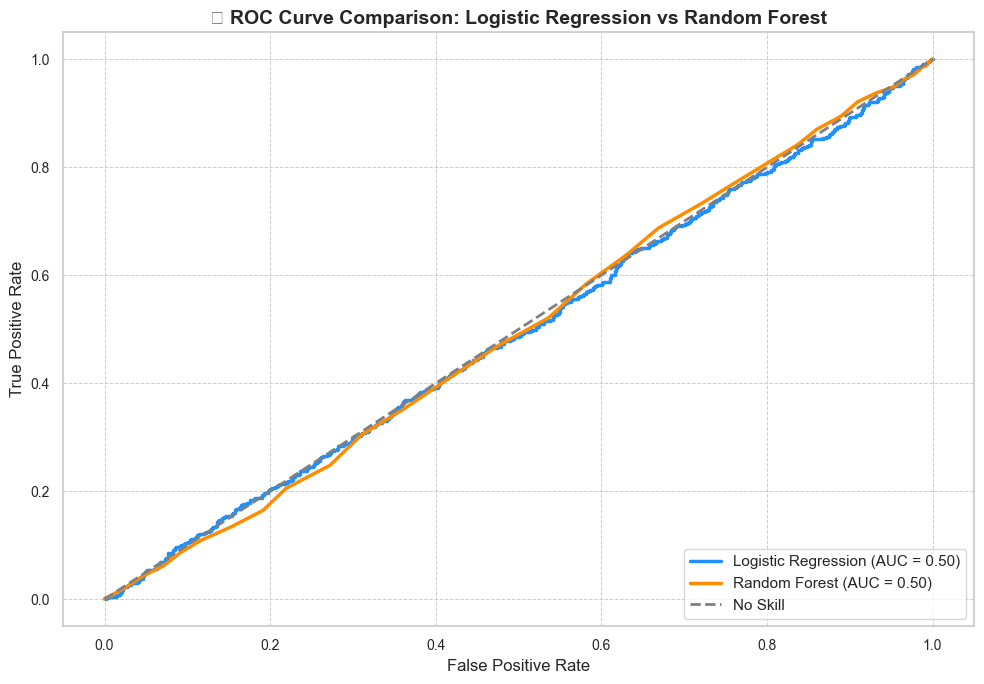

In [23]:
# Calculate ROC curves
fpr1, tpr1, _ = roc_curve(y_test, y_proba_log)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_rf)

# Set style and colors
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))

# Plot ROC curves
plt.plot(fpr1, tpr1, color='dodgerblue', lw=2.5, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log):.2f})')
plt.plot(fpr2, tpr2, color='darkorange', lw=2.5, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')

# Random chance line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='No Skill')

# Customize plot
plt.title('🌈 ROC Curve Comparison: Logistic Regression vs Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [25]:
#DONE
